## Note Esame Farinelli:
### Uninformed:
#### Tree-search:
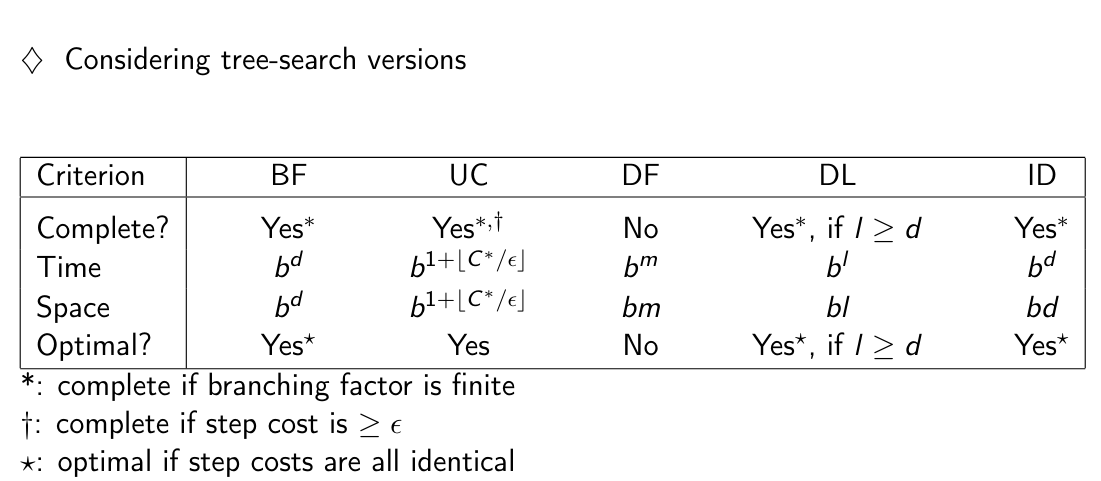
#### Graph-search:
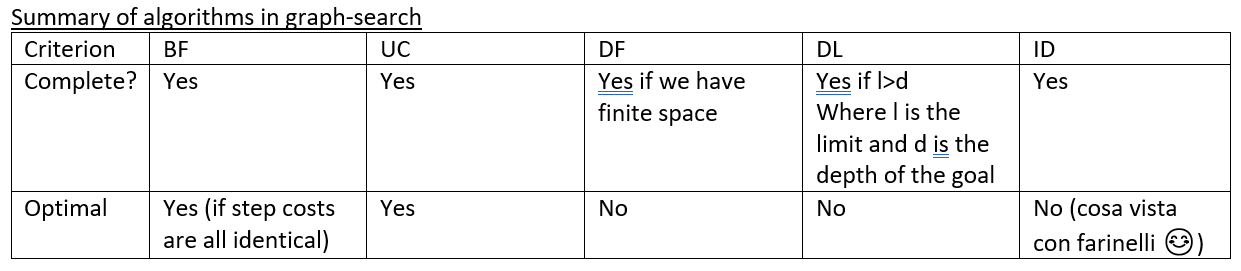
### Informed:
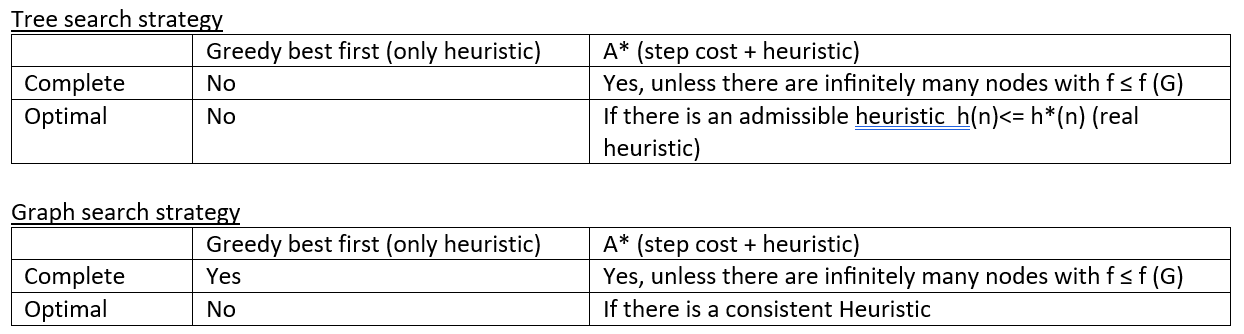

In [1]:
## Same Old imports 
import os, sys
module_path = os.path.abspath(os.path.join('tools'))
if module_path not in sys.path:
    sys.path.append(module_path)
import gym, envs
from utils.ai_lab_functions import *
from timeit import default_timer as timer
from tqdm import tqdm as tqdm
import numpy as np

### Search Strategies  

In [13]:
env= gym.make("SmallMaze-v0")

# Loop Data 
actions_n = env.action_space.n # Number of actions 
actions_p = env.actions # Map of all possible actions 
states_n = env.observation_space.n # Number of states (tiles)

# States numbers 
goalState_p = env.goalstate # Goal state
startState_p = env.startstate # Start state

# States/Pos conversion 
state_conv = env.pos_to_state(3,0) # Convert a position to a state number 
pos_conv = env.state_to_pos(startState_p) # Convert a state number to a position

# Sampling next action 
state = 2
action = 1
next_state = env.sample(state, action) # returns the state value for the chosen state-action pair

# Queue Commands:
nodeQueue = NodeQueue() # unsorted queue for uninformed Algos
p_queue = PriorityQueue() # sorted on value for infomed Algos 

first_node = Node(1) # Node(state,parent,path_cost,value)
nodeQueue.add(first_node) # appends a node to the queue 
nodeQueue.remove() # pops last node like in a FIFO 

# More complex Node declaration
second_node = Node(2,first_node,10,0)
print(second_node.pathcost) # get node pathcost


# Distance Heuristics for informed search algos:
pos1 = env.state_to_pos(env.startstate)
pos2 = env.state_to_pos(env.goalstate)

l1 = Heu.l1_norm(pos1,pos2) # More dominant 
l2 = Heu.l2_norm(pos1,pos2)
chebyshev = Heu.chebyshev(pos1,pos2)
print("L1: {}\nL2: {}\nChebyshew: {}".format(l1,l2,chebyshev))


10
L1: 3
L2: 2.23606797749979
Chebyshew: 2


### Reinforcement Learning 


#### Policy and Value Iteration:

In [27]:
env = gym.make('LavaFloor-v0')
print("Rewards:", env.RS)
print("Reward of starting state:", env.RS[env.startstate])


startState_p = env.startstate
state = env.sample(startState_p,0)
print("Probabilities:") # non so perchè non vada lol
print(env.T[startState_p, 0, state]) #(starting_position, action, goal_state)
print(env.T[startState_p, 1, state]) 
print(env.T[startState_p, 2, state])
print(env.T[startState_p, 3, state])

Rewards: [  1.   1.   1. -10.   1. -10.   1. -10.   1.   1.   1.  50.]
Reward of starting state: 1.0
Probabilities:
1.0
0.0
1.0
0.0


#### Q-learning and Sarsa:

In [28]:
env = gym.make("Cliff-v0")
state = env.reset()
action = 0 # Go UP
new_state, reward, done, _ = env.step(0)
print("State: {} \nAction: {} \nNew State: {} \nReward: {} \nDone: {}".format(state, action, new_state, reward, done))


State: 36 
Action: 0 
New State: 24 
Reward: -1 
Done: False
